/home/ubuntu/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


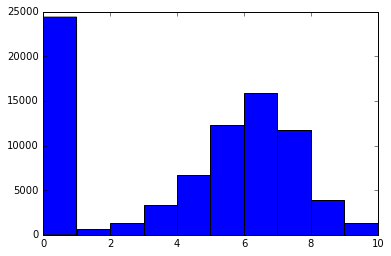

In [41]:
import pandas
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# conda install -c anaconda git

# git clone https://github.com/ThaWeatherman/scrapers.git

# Read in the data.
games = pandas.read_csv("scrapers/boardgamegeek/games.csv")
# Print the names of the columns in games.
print(games.columns)

#games.drop(columns=['id'], axis=1, inplace=True)
print(games.shape)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()

In [30]:
# games[games["average_rating"] == 0]

# Print the first row of all the games with zero scores.
# The .iloc method on dataframes allows us to index by position.
print(games[games["average_rating"] == 0].iloc[0])
# Print the first row of all the games with scores greater than 0.
print(games[games["average_rating"] > 0].iloc[0])


type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime   

(56932, 20)


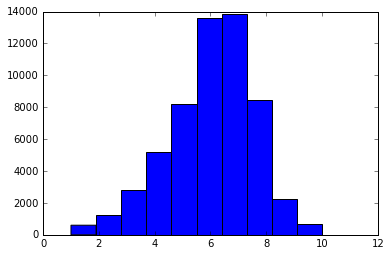

In [45]:
# Remove any rows without user reviews.
games = games[games["users_rated"] > 0]
print(games.shape)
# Remove any rows with missing values.
games = games.dropna(axis=0)

# Make a histogram of all the ratings in the average_rating column.
plt.hist(games["average_rating"])

# Show the plot.
plt.show()



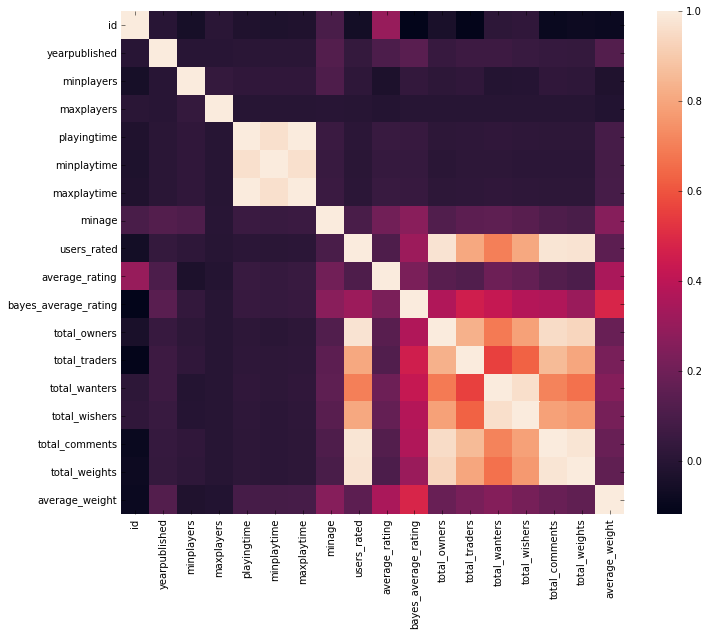

In [46]:
#correlation matrix
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=1, square=True);
plt.show()

In [47]:
# Get all the columns from the dataframe.
columns = games.columns.tolist()
# Filter the columns to remove ones we don't want.
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

# Store the variable we'll be predicting.
target = "average_rating"

In [58]:
#Liner Regression

# Import a function to split the sets.
from sklearn.cross_validation import train_test_split

# Generate the training set.  Set random_state to be able to repruce results each time.
train = games.sample(frac=0.8, random_state=1)
# Select anything not in the training set and put it in the testing set.
test = games.loc[~games.index.isin(train.index)]
# Print the shapes of both sets.
print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [71]:
# Import the linear regression model.
from sklearn.linear_model import LinearRegression

# Initialize the model class.
modelLR = LinearRegression()
# Fit the model to the training data.
modelLR.fit(train[columns], train[target])

# Import the scikit-learn function to compute error.
from sklearn.metrics import mean_squared_error

# Generate our predictions for the test set.
predictionsLR = modelLR.predict(test[columns])
# prediction for test data
print(predictionsLR)

# Compute error between our test predictions and the actual values.
mean_squared_error(predictionsLR, test[target])

#pefrect fit is 0 but its 2

[ 8.12061283  9.20860328  8.61000291 ...,  5.39229134  5.53885159
  6.07971124]


2.0788190326293261

In [69]:
# Import the random forest model.
from sklearn.ensemble import RandomForestRegressor

# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples 
# of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 
# The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), 
# otherwise the whole dataset is used to build each tree.

# Initialize the model with some parameters.
modelRFR = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=1)
# Fit the model to the data.
modelRFR.fit(train[columns], train[target])
# Make predictions.
predictionsRFR = modelRFR.predict(test[columns])
# Compute the error.
mean_squared_error(predictionsRFR, test[target])

1.4458564605687358

In [79]:
#single row of test data
sample_row=test[columns].iloc[0]
print("data:")
print(sample_row)
target_value=test[target].iloc[0]
print("target:")
print(target_value)

data:
yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64
target:
8.07933


In [80]:
ratingLR = modelLR.predict(sample_row)
print("LR Prediction:")
print(ratingLR)

LR Prediction
[ 8.12061283]


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [81]:
ratingRFR = modelRFR.predict(sample_row)
print("RFR Prediction")
print(ratingRFR)

RFR Prediction
[ 7.91373581]


/home/ubuntu/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
